<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2013%3A%20Financial%20Analytics/13_4_Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Analytics**
## Credit Risk Analysis

### **Problem Definition**

The German Bank wants to determine whether customers who apply for credit can be approved to give credit. The bank desires to know information about customers economic conditions which how much their salaries, what for customers want to take credit which buying a car, having a house, a tv or a mobile phone and so on. If the applicant is in the good condition to pay back money, the bank open a credit to customers who apply the bank credit services. The case is how to make faster decision that giving a credit to a new customer is risky or not instead of investigating one by one each applicant. According to previous applicants that is the research question. All it is needed to find most accurate model to evaluate the applicant credit approval. The German Bank System have applicants to Banks to take credit. The Credit approval services demand some information about applicants and keep this information to evaluate accepting or rejecting credit applies. Following information is about the applicants’ features the German Bank System’s requirements:

Variable Name | Variable Description
-------------------|------------------
Age| this feature is numerical information and legal age for applying the credit.
Gender| this is string and categorical information that two categories they are male or female.
Job| Job feature is a categorical feature that has four categories which are expressed numerical instead of categorical strings; 0: unskilled and non-resident, 1: unskilled and resident, 2: skilled, 3: high skilled.
Housing| this feature is string variable which means categorical that these are three categories which are own, rent and free.
Saving Account| this is a string variable that means categorical variable indicates if applicants have bank account there are four categories; little, moderate, quite rich, and rich. 
Checking Account| this is a categorical variable which means string have three categorical class that are little, moderate, and rich. 
Credit Amount| this is a numeric variable that how much money applicants apply on Deutsch Mark (DM)
Duration| this feature is numeric variable to show how many months the applicants want to pay back credit.
Purpose| this feature is string variable that means categorical variables consist of eight categories that is aim of taking credit targets are car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others.
Risk Situation| this feature is value target that string two categoric variable good or bad situation.


> For the research question original datasets includes 1000 entries and 20 features. But in this case, only few of features is used to analyse to model research question. Used features has been described in the problem definition section. There are ten features used in the analysis of this case which these features are Age, Gender, Job, Housing, Saving account, Checking account, Credit Amount, Duration, Purpose and Risk Situation.
The aim of this case study is to find out what algorithm or machine learning method gives the best accuracy or the best performance. The Bank Credit Approving department uses the algorithm to make more fast and efficient method without losing time on approvals.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

For the case study seven Classification Algorithm have been imported which are Naive Bayes (NB), Decision Tree (DT), Random Forest (RF), Logistic Regression (LR), K-Nearest Neighbour (KNN), Support Vector Machine (SVM) and Xgboost (XGB) Classifier models.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import sys
print(sys.base_prefix)
!pip3 install xgboost
from xgboost import XGBClassifier

/usr


Data have been upload and readed as a DataFrame via pandas library and 3 DataFrame work have been checked. First DataFrame (df) is going to be used with deleting missing values, Second DataFrame (df1) will be used without dropping missing values and the last DataFrame (df2) will be used as filling missing values with most repeated properties. 

In [ ]:
# Import Data
url = 'https://drive.google.com/file/d/1pbFWeYZLjtUUZyRssMvUgZQ3NR4VNU0a/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df1 = pd.read_csv(url2)
df2 = pd.read_csv(url2)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df1

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df2

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


The df has missing values which are going to be dropped before analyse.

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df0 = df.dropna(subset=['Saving accounts','Checking account'],inplace=True)


In [ ]:
df0 = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df0

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
X0 = df0.drop(['Risk'], axis=1)

In [ ]:
X0

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car
...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV
993,30,male,3,own,little,little,3959,36,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
y0 = df0['Risk']

In [ ]:
y0

1       bad
3      good
4       bad
7      good
9       bad
       ... 
989    good
993    good
996    good
998     bad
999    good
Name: Risk, Length: 522, dtype: object

In [ ]:
y0=pd.get_dummies(y0,columns=['Risk'])
y0.drop('bad',axis=1,inplace=True)

In [ ]:
X0=pd.get_dummies(X0, columns=["Sex","Job","Housing","Saving accounts", "Checking account", "Purpose"])
X0.drop("Sex_male",axis=1,inplace=True)
X0.drop("Job_0",axis=1,inplace=True)
X0.drop("Housing_free",axis=1,inplace=True)
X0.drop("Saving accounts_little",axis=1,inplace=True)
X0.drop("Checking account_little",axis=1,inplace=True)
X0.drop("Purpose_business",axis=1,inplace=True)

In [ ]:
X0

,Age,Credit amount,Duration,Sex_female,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,5951,48,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,45,7882,42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,35,6948,36,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
9,28,5234,30,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1743,24,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
993,30,3959,36,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
996,40,3857,30,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
998,23,1845,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y0

,good
1,0
3,1
4,0
7,1
9,0
...,...
989,1
993,1
996,1
998,0


### In this section, all algorithms have been applied to dropping missing values on data.



In [ ]:
f1_score_list = {}

#Logistic Regression (LR) 

In [ ]:
mdl_LR0 = LogisticRegression(random_state=7)
scale_mdl0 = StandardScaler()
X0 = scale_mdl0.fit_transform(X0)

In [ ]:
X_train0,X_test0,y_train0,y_test0 = train_test_split(X0,y0,test_size = 0.2, random_state = 7) 

mdl_LR0.fit(X_train0,np.ravel(y_train0))
ypred_train_LR0 = mdl_LR0.predict(X_train0)
ypred_test_LR0 = mdl_LR0.predict(X_test0)

LR0_f1_score = f1_score(y_test0, ypred_test_LR0)
print(LR0_f1_score)
f1_score_list['LR0']= LR0_f1_score

0.6896551724137931


# Decision Tree (DT)

In [ ]:
mdl_DT0 = DecisionTreeClassifier(random_state=7)

mdl_DT0.fit(X_train0,np.ravel(y_train0))
ypred_train_DT0 = mdl_DT0.predict(X_train0)
ypred_test_DT0 = mdl_DT0.predict(X_test0)

DT0_f1_score = f1_score(y_test0, ypred_test_DT0)
print(DT0_f1_score)
f1_score_list['DT0']= DT0_f1_score

0.6923076923076923


In [ ]:
f1_score_list

{'DT0': 0.6923076923076923, 'LR0': 0.6896551724137931}

In [ ]:
f1_scores = pd.DataFrame(f1_score_list.values(),index=f1_score_list.keys())
f1_scores

,0
LR0,0.689655
DT0,0.692308


# Random Forest (RF)

In [ ]:
mdl_RF0 = RandomForestClassifier(random_state=7)
classifierRF0 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 7)
classifierRF0.fit(X_train0,np.ravel(y_train0))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_RF0 = classifierRF0.predict(X_test0)

In [ ]:
RF0_f1_score = f1_score(y_test0, y_pred_RF0)
print(RF0_f1_score)
f1_score_list['RF0']= RF0_f1_score

0.7304347826086955


# Naive Bayes (NB)

In [ ]:
mdl_NB0 = GaussianNB()

In [ ]:
classifierNB0 = GaussianNB()
classifierNB0.fit(X_train0, np.ravel(y_train0))

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_NB0 = classifierNB0.predict(X_test0)

In [ ]:
NB0_f1_score = f1_score(y_test0, y_pred_NB0)
print(NB0_f1_score)
f1_score_list['NB0']= NB0_f1_score

0.6216216216216216


# K-Nearest Neighbour (KNN)


In [ ]:
mdl_KNN0 = KNeighborsClassifier()

In [ ]:
classifierKNN0 = KNeighborsClassifier(n_neighbors=5)
classifierKNN0.fit(X_train0, np.ravel(y_train0))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_KNN0 = classifierKNN0.predict(X_test0)

In [ ]:
KNN0_f1_score = f1_score(y_test0, y_pred_KNN0)
print(KNN0_f1_score)
f1_score_list['KNN0']= KNN0_f1_score

0.5982905982905983


# Support Vector Machine (SVM)

In [ ]:
mdl_SVM0 = SVC()

In [ ]:
classifierSVM0 = SVC(kernel = 'linear', random_state = 7)
classifierSVM0.fit(X_train0, np.ravel(y_train0))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_SVM0 = classifierSVM0.predict(X_test0)

In [ ]:
SVM0_f1_score = f1_score(y_test0, y_pred_SVM0)
print(SVM0_f1_score)
f1_score_list['SVM0']= SVM0_f1_score

0.6829268292682927


# XGBoost Classifier (XGB)

In [ ]:
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}

xgb_clf0 = XGBClassifier(**params)

xgb_clf0.fit(X_train0, np.ravel(y_train0))

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(xgb_clf0)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
y_pred_XGB0 = xgb_clf0.predict(X_test0)

In [ ]:
XGB0_f1_score = f1_score(y_test0, y_pred_XGB0)
print(XGB0_f1_score)
f1_score_list['XGB0']= XGB0_f1_score

0.6964285714285713


### In this section, all algorithms have been applied to data with missing values. 



In [ ]:
df1

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df300=pd.DataFrame(df1)

In [ ]:
df300

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
y1 = df1['Risk']

In [ ]:
y1

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [ ]:
X1 = df1.drop(['Risk','Unnamed: 0'], axis=1)

In [ ]:
X1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
y1=pd.get_dummies(y1,columns=['Risk'])
y1.drop('bad',axis=1,inplace=True)

In [ ]:
X1=pd.get_dummies(X1, columns=["Sex","Job","Housing","Saving accounts", "Checking account", "Purpose"])
X1.drop("Sex_male",axis=1,inplace=True)
X1.drop("Job_0",axis=1,inplace=True)
X1.drop("Housing_free",axis=1,inplace=True)
X1.drop("Saving accounts_little",axis=1,inplace=True)
X1.drop("Checking account_little",axis=1,inplace=True)
X1.drop("Purpose_business",axis=1,inplace=True)

# Logistic Regression

In [ ]:
mdl_LR1 = LogisticRegression()
scale_mdl1 = StandardScaler()
X1 = scale_mdl1.fit_transform(X1)

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.2, random_state = 7) 

mdl_LR1.fit(X_train1,np.ravel(y_train1))
ypred_train_LR1 = mdl_LR1.predict(X_train1)
ypred_test_LR1 = mdl_LR1.predict(X_test1)

LR1_f1_score = f1_score(y_test1, ypred_test_LR1)
print(LR1_f1_score)
f1_score_list['LR1']= LR1_f1_score

0.8395061728395061


# Decision Tree (DT)

In [ ]:
mdl_DT1 = DecisionTreeClassifier(random_state=7)

mdl_DT1.fit(X_train1,np.ravel(y_train1))
ypred_train_DT1 = mdl_DT1.predict(X_train1)
ypred_test_DT1 = mdl_DT1.predict(X_test1)

DT1_f1_score = f1_score(y_test1, ypred_test_DT1)
print(DT1_f1_score)
f1_score_list['DT1']= DT1_f1_score

0.6788321167883212


# Random Forest (RF)

In [ ]:
mdl_RF1 = RandomForestClassifier(random_state=7)
classifierRF1 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 7)
classifierRF1.fit(X_train1,np.ravel(y_train1))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_RF1 = classifierRF1.predict(X_test1)

In [ ]:
RF1_f1_score = f1_score(y_test1, y_pred_RF1)
print(RF1_f1_score)
f1_score_list['RF1']= RF1_f1_score

0.8238993710691823


In [ ]:
f1_scores = pd.DataFrame(f1_score_list.values(),index=f1_score_list.keys())
f1_scores.T

,LR0,DT0,RF0,NB0,KNN0,SVM0,XGB0,LR1,DT1,RF1
0,0.689655,0.692308,0.730435,0.621622,0.598291,0.682927,0.696429,0.839506,0.678832,0.823899


# Naive Bayes (NB)

In [ ]:
classifierNB1 = GaussianNB()
classifierNB1.fit(X_train1, np.ravel(y_train1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_NB1 = classifierNB1.predict(X_test1)

In [ ]:
NB1_f1_score = f1_score(y_test1, y_pred_NB1)
print(NB1_f1_score)
f1_score_list['NB1']= NB1_f1_score

0.7915194346289752


# K-Nearest Neighbour (KNN)


In [ ]:
classifierKNN1 = KNeighborsClassifier(n_neighbors=5)
classifierKNN1.fit(X_train1, np.ravel(y_train1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_KNN1 = classifierKNN1.predict(X_test1)

In [ ]:
KNN1_f1_score = f1_score(y_test1, y_pred_KNN1)
print(KNN1_f1_score)
f1_score_list['KNN1']= KNN1_f1_score

0.819047619047619


# Support Vector Machine (SVM)

In [ ]:
classifierSVM1 = SVC(kernel = 'linear', random_state = 7)
classifierSVM1.fit(X_train1, np.ravel(y_train1))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_SVM1 = classifierSVM1.predict(X_test1)

In [ ]:
SVM1_f1_score = f1_score(y_test1, y_pred_SVM1)
print(SVM1_f1_score)
f1_score_list['SVM1']= SVM1_f1_score

0.8538681948424068


# XGBoost Classifier (XGB)

In [ ]:
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}

xgb_clf1 = XGBClassifier(**params)

xgb_clf1.fit(X_train1, np.ravel(y_train1))

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(xgb_clf1)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
y_pred_XGB1 = xgb_clf1.predict(X_test1)

In [ ]:
XGB1_f1_score = f1_score(y_test1, y_pred_XGB1)
print(XGB1_f1_score)
f1_score_list['XGB1']= XGB1_f1_score

0.7878787878787878


### In this last section, missing values have been filled maximum repeted properties.

In [ ]:
df2

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
y2 = df2['Risk']

In [ ]:
y2

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [ ]:
X2 =df2.drop(['Risk','Unnamed: 0'], axis=1)

In [ ]:
X2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
dia =df2.drop(['Unnamed: 0'], axis=1)

In [ ]:
dia

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
X2.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [ ]:
df = px.data.tips()
fig = px.parallel_categories(dia,dimensions=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose','Risk'],color="Job", color_continuous_scale=px.colors.sequential.Inferno)

fig.show()

In [ ]:
X2['Saving accounts'] = X2['Saving accounts'].fillna('little')

In [ ]:
X2['Checking account'] = X2['Checking account'].fillna('moderate')

In [ ]:
X2.columns[X2.isnull().any()]

Index([], dtype='object')

In [ ]:
y2=pd.get_dummies(y2,columns=['Risk'])
y2.drop('bad',axis=1,inplace=True)

In [ ]:
X2=pd.get_dummies(X2, columns=["Sex","Job","Housing","Saving accounts", "Checking account", "Purpose"])

In [ ]:
X2

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,5951,48,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1736,12,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
996,40,3857,30,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,38,804,12,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
998,23,1845,45,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
X2.drop("Sex_male",axis=1,inplace=True)
X2.drop("Job_0",axis=1,inplace=True)
X2.drop("Housing_free",axis=1,inplace=True)
X2.drop("Saving accounts_little",axis=1,inplace=True)
X2.drop("Checking account_little",axis=1,inplace=True)
X2.drop("Purpose_business",axis=1,inplace=True)

# Logistic Regression

In [ ]:
mdl_LR2 = LogisticRegression(random_state=7)
scale_mdl2 = StandardScaler()
X2 = scale_mdl2.fit_transform(X2)

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.2, random_state = 7) 

mdl_LR2.fit(X_train2,np.ravel(y_train2))
ypred_train_LR2 = mdl_LR2.predict(X_train2)
ypred_test_LR2 = mdl_LR2.predict(X_test2)

LR2_f1_score = f1_score(y_test2, ypred_test_LR2)
print(LR2_f1_score)
f1_score_list['LR2']= LR2_f1_score

0.8589341692789969


# Decision Tree (DT)

In [ ]:
mdl_DT2 = DecisionTreeClassifier(random_state=7)

mdl_DT2.fit(X_train2,np.ravel(y_train2))
ypred_train_DT2 = mdl_DT2.predict(X_train2)
ypred_test_DT2 = mdl_DT2.predict(X_test2)

DT2_f1_score = f1_score(y_test2, ypred_test_DT2)
print(DT2_f1_score)
f1_score_list['DT2']= DT2_f1_score

0.7665505226480835


# Random Forest (RF)

In [ ]:
mdl_RF2 = RandomForestClassifier(random_state=7)
classifierRF2 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 7)
classifierRF2.fit(X_train2,np.ravel(y_train2))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_RF2 = classifierRF2.predict(X_test2)

In [ ]:
RF2_f1_score = f1_score(y_test2, y_pred_RF2)
print(RF2_f1_score)
f1_score_list['RF2']= RF2_f1_score

0.8553459119496856


# Naive Bayes (NB)

In [ ]:
classifierNB2 = GaussianNB()
classifierNB2.fit(X_train2, np.ravel(y_train2))

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_NB2 = classifierNB2.predict(X_test2)

In [ ]:
NB2_f1_score = f1_score(y_test2, y_pred_NB2)
print(NB2_f1_score)
f1_score_list['NB2']= NB2_f1_score

0.8056537102473499


# K-Nearest Neighbour (KNN)

In [ ]:
classifierKNN2 = KNeighborsClassifier(n_neighbors=5)
classifierKNN2.fit(X_train2, np.ravel(y_train2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_KNN2 = classifierKNN2.predict(X_test2)

In [ ]:
KNN2_f1_score = f1_score(y_test2, y_pred_KNN2)
print(KNN2_f1_score)
f1_score_list['KNN2']= KNN2_f1_score

0.8269230769230769


# Support Vector Machine (SVM)

In [ ]:
classifierSVM2 = SVC(kernel = 'linear', random_state = 7)
classifierSVM2.fit(X_train2, np.ravel(y_train2))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_SVM2 = classifierSVM2.predict(X_test2)

In [ ]:
SVM2_f1_score = f1_score(y_test2, y_pred_SVM2)
print(SVM2_f1_score)
f1_score_list['SVM2']= SVM2_f1_score

0.7903780068728522


# XGBoost Classifier (XGB)

In [ ]:
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100}

xgb_clf2 = XGBClassifier(**params)

xgb_clf2.fit(X_train2, np.ravel(y_train2))

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(xgb_clf2)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
y_pred_XGB2 = xgb_clf2.predict(X_test2)

In [ ]:
XGB2_f1_score = f1_score(y_test2, y_pred_XGB2)
print(XGB2_f1_score)
f1_score_list['XGB2']= XGB2_f1_score

0.8106312292358804


In [ ]:
f1_scores = pd.DataFrame(f1_score_list.values(),index=f1_score_list.keys(),columns=['f1_scores'])
f1_scores.sort_values(by=['f1_scores'])

,f1_scores
KNN0,0.598291
NB0,0.621622
DT1,0.678832
SVM0,0.682927
LR0,0.689655
DT0,0.692308
XGB0,0.696429
RF0,0.730435
DT2,0.766551
XGB1,0.787879


In [ ]:
f1_scores.T

,LR0,DT0,RF0,NB0,KNN0,SVM0,XGB0,LR1,DT1,RF1,NB1,KNN1,SVM1,XGB1,LR2,DT2,RF2,NB2,KNN2,SVM2,XGB2
f1_scores,0.689655,0.692308,0.730435,0.621622,0.598291,0.682927,0.696429,0.839506,0.678832,0.823899,0.791519,0.819048,0.853868,0.787879,0.858934,0.766551,0.855346,0.805654,0.826923,0.790378,0.810631


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

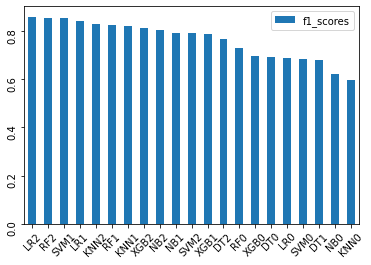

In [ ]:
f1_scores.sort_values(by=['f1_scores'],ascending=False).plot.bar()
f1_scores[f1_scores['f1_scores']==f1_scores['f1_scores'].max()]
plt.xticks(rotation=45)
plt.yticks(rotation=90)

In [ ]:
f1_scores[f1_scores['f1_scores']==f1_scores['f1_scores'].max()]

,f1_scores
LR2,0.858934


It can be understood from the *f1_scores* table that *LR2 f1_score* has the highest score compering the rest of the models. As a result, LR (Logistic Regression) model has been selected by the German Bank to applied which decision have made new customer application. There are other models which they have also sensible f1_score to use but LR is the highest one even if there is no big difference amongst other models. 